# Classification of an Athelete's gender and testing accuracy using different Machine Learning Models

The attributes used for classification and analysis are:

1) Age
2) Weight
3) Height
4) Season 

# Importing prerequisite libraries.

In [36]:
import torch
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from torch.utils.data.dataset import Dataset
from torch.autograd import Variable
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import os
%matplotlib inline 

# Import both datasets.

In [37]:
olydata = pd.read_csv('Downloads/athlete_events.csv')
reg = pd.read_csv('Downloads/noc_regions.csv')

In [38]:
olydata.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
olydata.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Dropping the duplicate tuples.

In [5]:
olydata.drop_duplicates()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [6]:
olydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Repeat the previous procedure for 2nd dataset i.e. noc_regions

In [7]:
reg.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
reg.drop_duplicates()  #here too we drop all the duplicate entities as done previously.

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [9]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


# Merging both datasets.

In [10]:
combine = pd.merge(olydata, reg, on='NOC', how='left')

In [11]:
combine.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Dropping null values and clean data

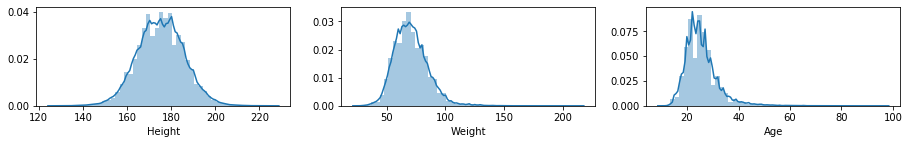

In [15]:
#Dropping tuples with null values
dropped_nan_height = olydata["Height"].dropna()
dropped_nan_weight = olydata["Weight"].dropna()
dropped_nan_age = olydata["Age"].dropna()

fig = pyplot.figure()
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
pyplot.subplots_adjust(left=1, right=3)

sns.distplot(dropped_nan_height, ax=ax1)
sns.distplot(dropped_nan_weight, ax=ax2)
sns.distplot(dropped_nan_age, ax=ax3)


# Previous Gender Specific Analysis and Data Visualization

In [51]:
# Analysis for male Population

malepopulation = combine[(combine.Sex == 'M') & (combine.Sport == 'Swimming')]
malepopulation.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Finland,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,Finland,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
39,15,Arvo Ossian Aaltonen,M,34.0,NaN,NaN,Finland,FIN,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Finland,NaN
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,NaN,Netherlands,NaN
101,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,NaN,Netherlands,NaN
102,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN,Netherlands,NaN
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,NaN,Netherlands,NaN


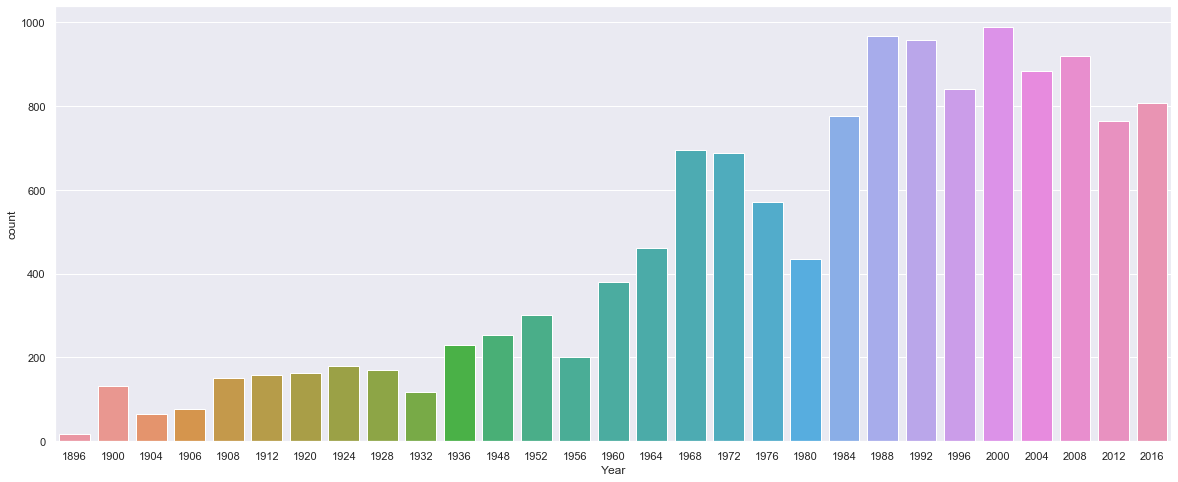

In [52]:
from matplotlib import pyplot as plt  # medals for male population
plt.figure(figsize=(20, 8))
sns.set(style="darkgrid")
hue = 'islong'
saturation = 1
sns.countplot(x='Year', data=malepopulation)

In [53]:
# Analysis of Female Population

femalepopulation = combine[(combine.Sex == 'F') & (combine.Sport == 'Swimming')]
femalepopulation.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
474,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 100 metres Backstroke,NaN,Canada,NaN
475,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 200 metres Backstroke,NaN,Canada,NaN
476,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,Canada,NaN
517,290,Fatima Abdul Majeed Hameed Al-Kirashi,F,14.0,NaN,NaN,Bahrain,BRN,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 50 metres Freestyle,NaN,Bahrain,NaN
729,417,Sara Helena berg,F,17.0,190.0,73.0,Sweden,SWE,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 50 metres Freestyle,NaN,Sweden,NaN
740,424,Moira Abernethy (-Ford),F,17.0,NaN,NaN,South Africa,RSA,1956 Summer,1956,Summer,Melbourne,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,South Africa,NaN
741,424,Moira Abernethy (-Ford),F,17.0,NaN,NaN,South Africa,RSA,1956 Summer,1956,Summer,Melbourne,Swimming,Swimming Women's 100 metres Backstroke,NaN,South Africa,NaN
969,546,Inna Vladimirovna Abramova,F,21.0,172.0,63.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 50 metres Freestyle,NaN,Russia,NaN
970,546,Inna Vladimirovna Abramova,F,21.0,172.0,63.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN,Russia,NaN
1301,733,Ilona cs (-Zimmermann),F,16.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Freestyle,NaN,Hungary,NaN


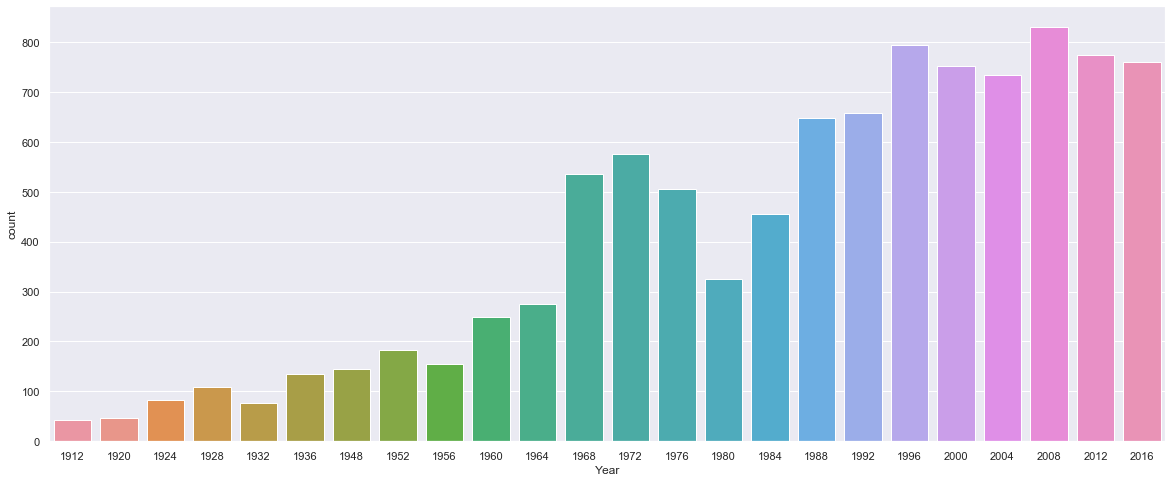

In [54]:
from matplotlib import pyplot as plt  # medals for female population
plt.figure(figsize=(20, 8))
sns.set(style="darkgrid")
hue = 'islong'
saturation = 1
sns.countplot(x='Year', data=femalepopulation)

When we visualized the data, we made a conviction that this dataset can be better tested initially by using "Decision tree" model as the only attributes used were height,weight,season for male and female nodes.

Here our assumption was that if an athlete is a male then we label his gender as true i.e. 1 otherwise 0. 

Also, for season, summer is labeled as 1 and winter as 0 value.

# (1) Decision Tree

In [17]:
data_with_predict = ["Season", "Weight", "Height", "Sex","Age"]
features = ["SeasonBinary", "Weight", "Height", "Age"]
data = olydata[data_with_predict].dropna()
data["BinarySex"] = (lambda x:  [1 if t=="M" else 0 for t in x])(data["Sex"])
data["SeasonBinary"] = (lambda x:  [1 if t=="Summer" else 0 for t in x])(data["Season"])
from sklearn.model_selection import train_test_split
from sklearn import tree
train, test = train_test_split(data, test_size=0.3)

X_train = train.as_matrix(columns=features)
Y_train = train.as_matrix(columns=["BinarySex"]).flatten()
X_test = test.as_matrix(columns=features)
Y_test = test.as_matrix(columns=["BinarySex"]).flatten()

C:\Users\mundl\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mundl\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\mundl\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\mundl\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


# Training and Testing

In [18]:
#training the data
classify = tree.DecisionTreeClassifier()
classify = classify.fit(X_train, Y_train)

#testing the data
classify.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
acc_percentage = np.array(Y_test == classify.predict(X_test)).astype(np.int).sum()/len(Y_test) * 100
print("Accuracy on Test: {:3.4f}%".format(acc_percentage))

Accuracy on Test: 80.0986%


Results :  As we can see that we concluded with a very good accuracy of 80.1 % for classifying whether athlete in Olympics is 
           either male or female

Now, we can can move on to another model for comparison of accuracy

# (2) Artificial Neural Network 

Here, we made use of PyTorch library and imported it previously to avoid overfitting of data. 

# Splitting into Train and Test data for model.

In [20]:
train, test = train_test_split(data, test_size=0.3)  #Only 30% of dataset is used i.e. 60k tuples
valid_idx = int(len(train) * 0.1)
valid = train[:valid_idx]

class olydata(Dataset):
    def __init__(self,train,transforms=None):
        self.X = train.as_matrix(columns=features)
        self.Y = train.as_matrix(columns=["BinarySex"]).flatten()
        self.count = len(self.X)
        # get iterator
        self.transforms = transforms

    def __getitem__(self, index):
        nextItem = Variable(torch.tensor(self.X[index]).type(torch.FloatTensor))

        if self.transforms is not None:
            nextItem = self.transforms(nextItem[0])

        # return tuple but with no label
        return (nextItem, self.Y[index])

    def __len__(self):
        return self.count # of how many examples(images?) you have
olympicDS = olydata(train)
validDS = olydata(valid)
train_loader = torch.utils.data.DataLoader(olympicDS,
            batch_size=250, shuffle=False)
valid_loader = torch.utils.data.DataLoader(validDS,
            batch_size=1, shuffle=False)
testDS = olydata(test)
test_loader = torch.utils.data.DataLoader(testDS,
            batch_size=1, shuffle=False)


C:\Users\mundl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\mundl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Now we Define the whole Model using epoch concept, as epoch is total number of times the data is provided to neural network in forward and backward fashion and can prove helpful instead of iteration technique as iteration process is slow because it decomposes the dataset into batches.

In [21]:
epochs = 8
class DNN(nn.Module):
    def __init__(self, input_size, first_hidden_size, second_hidden_size, num_classes):
        super(DNN, self).__init__()
        self.z1 = nn.Linear(input_size, first_hidden_size) # wx + b
        self.relu = nn.ReLU()
        self.z2 = nn.Linear(first_hidden_size, second_hidden_size)
        self.z3 = nn.Linear(second_hidden_size, num_classes)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.z1(x) # input
        out = self.relu(out)

        out = self.z2(out) # first hidden layer
        out = self.relu(out)

        out = self.z3(out) # second hidden layer

        out = self.log_softmax(out) # output
        return out

    def name(self):
        return "DNN"

Now we Train the model using "Negative log likelihood" using 8 Epochs and LR=0.001

In [22]:
def train_dnn(net, trainL, validL):
    count = 0
    accuList = []
    lossList = []
    optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
    for epc in range(1,epochs + 1):
        print("Epoch # {}".format(epc))
        vcount = 0
        total_loss = 0
        net.train()
        for data,target in trainL:
            optimizer.zero_grad()
            out = net(data)
            loss = F.nll_loss(out, target, size_average=False)
            pred = out.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            count += pred.eq(target.data.view_as(pred)).sum()
            # Backward and optimize
            loss.backward()
            # update parameters
            optimizer.step()
        net.eval()
        for data, target in validL:
            out = net(data)
            loss = F.nll_loss(out, target, size_average=False)
            total_loss += loss.item()
            pred = out.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            vcount += pred.eq(target.data.view_as(pred)).sum().item()
        
        accuList.append(100. * (vcount / len(validL)))
        lossList.append(total_loss / len(validL))
    
    return accuList, lossList
     
myNet = DNN(4, 8, 4, 2)
accuList, lossList = train_dnn(myNet, train_loader, valid_loader)


Epoch # 1


C:\Users\mundl\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch # 2
Epoch # 3
Epoch # 4
Epoch # 5
Epoch # 6
Epoch # 7
Epoch # 8


In [50]:
def test(net, loader):
    net.eval()
    vcount = 0
    count = 0
    total_loss = 0.0
    for data, target in loader:
        out = net(data)
        loss = F.nll_loss(out, target, size_average=False)
        total_loss += loss.item()
        pred = out.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        vcount += pred.eq(target.data.view_as(pred)).sum().item()
    return 100. * (vcount / len(loader)), total_loss / len(loader)
test_acc, test_loss = test(myNet, test_loader)
print("The test set accuracy is {:3.4f}% \nThe average loss is : {}".format(test_acc, test_loss))

The test set accuracy is 78.4527% 
The average loss is : 0.4605139042108215


# Results Plotted.

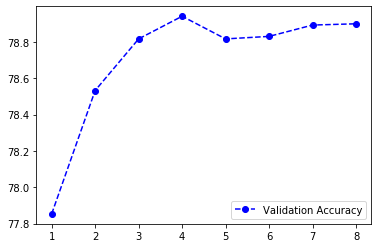

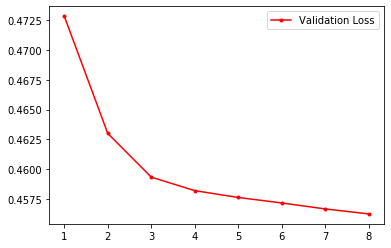

In [35]:
pyplot.figure()
pyplot.plot(range(1, epochs + 1), accuList, "b--", marker="o", label='Validation Accuracy')
pyplot.legend()
pyplot.show()
pyplot.figure()
pyplot.plot(range(1, epochs + 1), lossList, "r", marker=".", label='Validation Loss')
pyplot.legend()
pyplot.show()

The results here which we concluded show that the Decision tree approach is more effective than that of using the Artificial neural network as the Accuracy for both machine learning models is:

Decision Tree             : 80.09 % and
Artificial Neural Network : 78.45 %

So, decision tree is suriprisingly more advantageous than neural network in this case.